# Lab | Comparing regression models

For this lab, we will be using the same dataset we used in the previous labs. We recommend using the same notebook since you will be reusing the same variables you previous created and used in labs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv(r'C:\Users\claud\lab-cleaning-numerical-data\files_for_lab\we_fn_use_c_marketing_customer_value_analysis.csv')

In [23]:
data.columns = [x.lower().replace(" ", "_") for x in data.columns]
data.columns

Index(['customer', 'state', 'customer_lifetime_value', 'response', 'coverage',
       'education', 'effective_to_date', 'employmentstatus', 'gender',
       'income', 'location_code', 'marital_status', 'monthly_premium_auto',
       'months_since_last_claim', 'months_since_policy_inception',
       'number_of_open_complaints', 'number_of_policies', 'policy_type',
       'policy', 'renew_offer_type', 'sales_channel', 'total_claim_amount',
       'vehicle_class', 'vehicle_size'],
      dtype='object')

In [24]:
data = data.set_index('customer')

In [25]:
data['effective_to_date'] = pd.to_datetime(data['effective_to_date'])

In [26]:
data['day'] = data['effective_to_date'].dt.day
data['week'] = data['effective_to_date'].dt.week
data['month'] = data['effective_to_date'].dt.month

In [27]:
data['day'] = pd.to_numeric(data['day'], errors='coerce')
data['week'] = pd.to_numeric(data['week'], errors='coerce')
data['month'] = pd.to_numeric(data['month'], errors='coerce')

In [28]:
data = data.drop(['effective_to_date'], axis=1)
data.head()

,state,customer_lifetime_value,response,coverage,education,employmentstatus,gender,income,location_code,marital_status,...,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size,day,week,month
customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,...,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,24,8,2
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,...,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,31,5,1
AI49188,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,...,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,19,7,2
WW63253,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,...,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,20,3,1
HB64268,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,...,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,3,5,2


In [29]:
data = pd.get_dummies(data, drop_first=True)

In [30]:
data.dtypes

customer_lifetime_value           float64
income                              int64
monthly_premium_auto                int64
months_since_last_claim             int64
months_since_policy_inception       int64
number_of_open_complaints           int64
number_of_policies                  int64
total_claim_amount                float64
day                                 int64
week                                int64
month                               int64
state_California                    uint8
state_Nevada                        uint8
state_Oregon                        uint8
state_Washington                    uint8
response_Yes                        uint8
coverage_Extended                   uint8
coverage_Premium                    uint8
education_College                   uint8
education_Doctor                    uint8
education_High School or Below      uint8
education_Master                    uint8
employmentstatus_Employed           uint8
employmentstatus_Medical Leave    

### 1. In this final lab, we will model our data. Import sklearn train_test_split and separate the data.


In [31]:
y = data['total_claim_amount']
X = data.drop(['total_claim_amount'],axis=1)

In [35]:
transformer = StandardScaler().fit(data)

x_standardized = transformer.transform(data)
x_standardized = pd.DataFrame(x_standardized, index = data.index)#, columns = ['customer_lifetime_value', 'income', 'monthly_premium_auto',
       #'months_since_last_claim', 'months_since_policy_inception',
       #'number_of_open_complaints', 'number_of_policies',
       #'total_claim_amount'])

In [36]:
X = x_standardized

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Try a simple linear regression with all the data to see whether we are getting good results.

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
predictions = model.predict(X_test)

In [40]:
r2_score(y_test, predictions), mean_absolute_error(y_test, predictions), mean_squared_error(y_test, predictions, squared=False)

(1.0, 2.94915010568832e-13, 3.843506696994419e-13)

### 3. Great! Now define a function that takes a list of models and train (and tests) them so we can try a lot of them without repeating code.

In [47]:
def models(model_name, X, y, KNN_range = range(2,10)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    if model_name == 'LinearRegression':
        model = LinearRegression()
        model.fit(X_train, y_train) 
        predictions = model.predict(X_test)
        print('R2 score =', r2_score(y_test, predictions))

    if model_name == 'KNN':
        scores = []
        for i in KNN_range:
            model = KNeighborsRegressor(n_neighbors=i)
            model.fit(X_train, y_train)
            scores.append(model.score(X_test, y_test))
        print(scores)

        plt.figure(figsize=(10,6))
        plt.plot(KNN_range,scores,color = 'darkslategrey', linestyle='dashdot',
        marker='o', markerfacecolor='darkcyan', markersize=10)
        plt.title('accuracy scores vs. K Value')
        plt.xlabel('K')
        plt.ylabel('Accuracy')
    
    if model_name == 'MLP':
        model = MLPRegressor()
        model.fit(X_train, y_train)

        expected_y  = y_test
        predicted_y = model.predict(X_test)
        print('R2 score =',r2_score(expected_y, predicted_y))

### 4. Use the function to check LinearRegressor and KNeighborsRegressor.

In [42]:
models('LinearRegression', X, y)

R2 score = 1.0


[0.696016943990347, 0.7302882705107913, 0.7461926073178331, 0.7509089120711043, 0.7548339068787251, 0.7603485434445362, 0.7585738788178724, 0.7527295679482957]


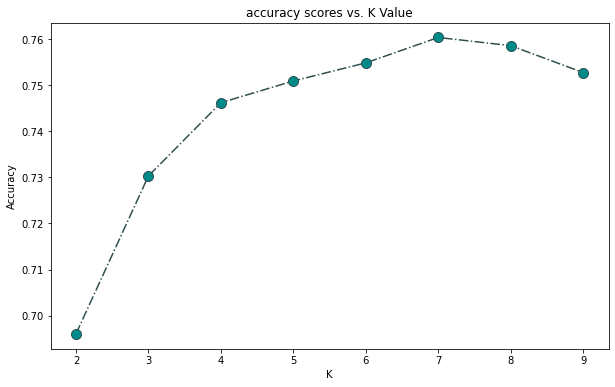

In [45]:
models('KNN', X, y)

### 5. You can check also the MLPRegressor for this task!

In [48]:
models('MLP',X,y)

R2 score = 0.9959792628123999


### 6. Check and discuss the results.

All models seems overfitted:

- The Linear Regression is overfitted, therefore we got r2 score = 1
- KNN presented best performance when k = 7 (score = 0.76)
- MLP Regressor also seems overfitted with r2 score = 0.99